# Rockingham County, VA: Ideal Locations for New Businesses (Restaurant & Building Contractor)

### **Purpose**

#### Personal endeavors and details of the business’ underlying structure aside, and for the purposes of this study, we will be exploring where the most ideal locations would be to establish a new restaurant and a new building contractor firm within the Rockingham County area in Virginia.  Located in the heart of the beautiful Shenandoah Valley, Rockingham County is home to several cities, major landmarks, historical sites, and smaller unincorporated communities.  The county was even named one the of best performing small metropolitan areas within the United States, making it an ideal locale to start a new business.

#### This source code will be used to utilized collected data on cities in Rockingham County to rank cities based on certain metrics and see which established venues are commonplace.  We will cluster these in groups by venue and rank, and use all of the presented data to forge a recommendation.  Since the venue data can shift over time, the recommendations will be listed the report for this study.

##### *Import needed libraries*

In [1]:
import pandas as pd
import requests
from pandas.io.json import json_normalize
import numpy as np
import matplotlib.cm as cm
import matplotlib.colors as colors
#!pip install folium
import folium
import seaborn as sn
import matplotlib.pyplot as plt
print('All libraries have successfully imported!')

All libraries have successfully imported!


##### *Import data table containing latitudes and longitudes of the cities in Rockingham County*
###### *This data was put together into a CSV file from unstructured sources.*

In [2]:
# import data table from CSV file
import csv
with open('Rockingham_County.csv') as csvfile:
    readCSV = csv.reader(csvfile, delimiter=',')
df_rockingham = pd.read_csv('Rockingham_County.csv')
df_rockingham

,City,Latitude,Longitude,Population,Avg_Household_Income,Real_Estate_Tax,Food_Tax,Crime_Rate
0,Harrisonburg,38.4496,-78.8689,53064,"$43,009.00",$0.86,7.00%,19.12
1,Elkton,38.4079,-78.6236,2795,"$52,808.00",$0.11,7.00%,10.76
2,Broadway,38.6132,-78.7989,3793,"$44,852.00",$0.07,4.00%,2.54
3,Dayton,38.4138,-78.9389,1622,"$52,664.00",$0.08,5.00%,5.54
4,Massanutten,38.4096,-78.7378,2273,"$76,473.00",$0.74,4.00%,7.79
5,Bridgewater,38.3821,-78.9767,5930,"$58,625.00",$0.75,6.00%,4.57
6,McGaheysville,38.3711,-78.7326,2147,"$55,271.00",$0.74,4.00%,7.79
7,Timberville,38.6390,-78.7739,2592,"$47,132.00",$0.11,4.00%,9.02
8,Mount Crawford,38.3571,-78.9409,403,"$68,125.00",$0.07,4.00%,20.30
9,Linville,38.5204,-78.8375,938,"$40,530.00",$0.74,4.00%,14.10


##### *Connect to the Foursquare API*

In [3]:
CLIENT_ID = 'FTGWFBW5V4DDR3DGJHIUTOMA1U2Z2CPGBX32O4DYDWNSPOZX' # Foursquare ID
CLIENT_SECRET = 'T1YX0SIDMGB5GKCVORNDNYJH4URQRSCW0HPK1NI0CCAM35U3' # Foursquare Secret
VERSION = '20180605' # Foursquare API version

LIMIT = 100 # limit of number of venues returned by Foursquare API
radius = 500 # define radius

##### *Create function that obtains venues in Rockingham County*

In [4]:
def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):

        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['City',
                  'City Latitude',
                  'City Longitude',
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [5]:
rockingham_venues = getNearbyVenues(names=df_rockingham['City'], latitudes=df_rockingham['Latitude'], longitudes=df_rockingham['Longitude'])
rockingham_venues

print('There are {} unique categories of venue.'.format(len(rockingham_venues['Venue Category'].unique())))  # comment out this line with '#' to see entire list of venues

There are 47 unique categories of venue.


##### *Frequency of occurrence of venues in Rockingham County cities*

In [6]:
# one hot encoding
rockingham_onehot = pd.get_dummies(rockingham_venues[['Venue Category']], prefix="", prefix_sep="")

# add city column back to dataframe
rockingham_onehot['City'] = rockingham_venues['City'] 

# move neighborhood column to the first column
fixed_columns = [rockingham_onehot.columns[-1]] + list(rockingham_onehot.columns[:-1])
rockingham_onehot = rockingham_onehot[fixed_columns]

rockingham_grouped = rockingham_onehot.groupby('City').mean().reset_index()
rockingham_grouped

,City,American Restaurant,Arcade,Art Gallery,Asian Restaurant,Bakery,Bank,Bar,Beer Store,Bike Shop,...,Plaza,Sandwich Place,Seafood Restaurant,Snack Place,Southern / Soul Food Restaurant,Steakhouse,Theater,Video Store,Wine Shop,Yoga Studio
0,Bridgewater,0.000000,0.00000,0.00,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
1,Broadway,0.000000,0.00000,0.00,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.5,0.00000,0.00000
2,Dayton,0.500000,0.00000,0.50,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
3,Elkton,0.000000,0.00000,0.00,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.083333,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
4,Harrisonburg,0.047619,0.02381,0.00,0.02381,0.0,0.02381,0.119048,0.02381,0.02381,...,0.02381,0.000000,0.02381,0.02381,0.02381,0.02381,0.02381,0.0,0.02381,0.02381
5,Linville,0.000000,0.00000,0.00,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
6,Massanutten,0.250000,0.00000,0.25,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
7,McGaheysville,0.000000,0.00000,0.00,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.500000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
8,Mount Crawford,0.000000,0.00000,0.00,0.00000,1.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000
9,Timberville,0.333333,0.00000,0.00,0.00000,0.0,0.00000,0.000000,0.00000,0.00000,...,0.00000,0.000000,0.00000,0.00000,0.00000,0.00000,0.00000,0.0,0.00000,0.00000


##### *Retrieve venue categories in Rockingham County cities*

In [7]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

##### *View the most common venues in Rockingham County cities*

In [8]:
num_top_venues = 3

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['City']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
rockingham_venues_sorted = pd.DataFrame(columns=columns)
rockingham_venues_sorted['City'] = rockingham_grouped['City']

for ind in np.arange(rockingham_grouped.shape[0]):
    rockingham_venues_sorted.iloc[ind, 1:] = return_most_common_venues(rockingham_grouped.iloc[ind, :], num_top_venues)

rockingham_venues_sorted

,City,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Bridgewater,Chinese Restaurant,Ice Cream Shop,Italian Restaurant
1,Broadway,Café,Video Store,Yoga Studio
2,Dayton,American Restaurant,Art Gallery,Café
3,Elkton,Food,Mexican Restaurant,Gift Shop
4,Harrisonburg,Bar,American Restaurant,New American Restaurant
5,Linville,Home Service,Yoga Studio,Gift Shop
6,Massanutten,American Restaurant,Art Gallery,Convenience Store
7,McGaheysville,Discount Store,Sandwich Place,Yoga Studio
8,Mount Crawford,Bakery,Yoga Studio,Café
9,Timberville,American Restaurant,Pizza Place,Gas Station


##### *Use K-Means clustering to cluster cities together based on the types of venues they have in common*

In [9]:
from sklearn.cluster import KMeans

# set number of clusters
kclusters = 5

rockingham_grouped_clustering = rockingham_grouped.drop('City', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(rockingham_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 4, 0, 0, 0, 1, 0, 3, 2, 0], dtype=int32)

In [10]:
# add clustering labels
rockingham_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

##### *Create merged table with original dataset, new common venues from Foursquare API, and new cluster labels from K-means clustering*

In [11]:
rockingham_merged = df_rockingham

# add city metrics back
rockingham_merged = rockingham_merged.join(rockingham_venues_sorted.set_index('City'), on='City')

rockingham_merged

,City,Latitude,Longitude,Population,Avg_Household_Income,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Harrisonburg,38.4496,-78.8689,53064,"$43,009.00",$0.86,7.00%,19.12,0,Bar,American Restaurant,New American Restaurant
1,Elkton,38.4079,-78.6236,2795,"$52,808.00",$0.11,7.00%,10.76,0,Food,Mexican Restaurant,Gift Shop
2,Broadway,38.6132,-78.7989,3793,"$44,852.00",$0.07,4.00%,2.54,4,Café,Video Store,Yoga Studio
3,Dayton,38.4138,-78.9389,1622,"$52,664.00",$0.08,5.00%,5.54,0,American Restaurant,Art Gallery,Café
4,Massanutten,38.4096,-78.7378,2273,"$76,473.00",$0.74,4.00%,7.79,0,American Restaurant,Art Gallery,Convenience Store
5,Bridgewater,38.3821,-78.9767,5930,"$58,625.00",$0.75,6.00%,4.57,0,Chinese Restaurant,Ice Cream Shop,Italian Restaurant
6,McGaheysville,38.3711,-78.7326,2147,"$55,271.00",$0.74,4.00%,7.79,3,Discount Store,Sandwich Place,Yoga Studio
7,Timberville,38.6390,-78.7739,2592,"$47,132.00",$0.11,4.00%,9.02,0,American Restaurant,Pizza Place,Gas Station
8,Mount Crawford,38.3571,-78.9409,403,"$68,125.00",$0.07,4.00%,20.30,2,Bakery,Yoga Studio,Café
9,Linville,38.5204,-78.8375,938,"$40,530.00",$0.74,4.00%,14.10,1,Home Service,Yoga Studio,Gift Shop


##### *Using the above merged table, create a visual map of the Rockingham County area highlighting the clusters*

In [12]:
latitude = rockingham_merged['Latitude'].mean()
longitude = rockingham_merged['Longitude'].mean()

# create map
rockingham_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(rockingham_merged['Latitude'], rockingham_merged['Longitude'], rockingham_merged['City'], rockingham_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(rockingham_clusters)
       
rockingham_clusters

##### *View tables of each cluster*

In [13]:
cluster0 = rockingham_merged.loc[rockingham_merged['Cluster Labels'] == 0, rockingham_merged.columns[[0] + list(range(5, rockingham_merged.shape[1]))]]
cluster0

,City,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
0,Harrisonburg,$0.86,7.00%,19.12,0,Bar,American Restaurant,New American Restaurant
1,Elkton,$0.11,7.00%,10.76,0,Food,Mexican Restaurant,Gift Shop
3,Dayton,$0.08,5.00%,5.54,0,American Restaurant,Art Gallery,Café
4,Massanutten,$0.74,4.00%,7.79,0,American Restaurant,Art Gallery,Convenience Store
5,Bridgewater,$0.75,6.00%,4.57,0,Chinese Restaurant,Ice Cream Shop,Italian Restaurant
7,Timberville,$0.11,4.00%,9.02,0,American Restaurant,Pizza Place,Gas Station


In [14]:
cluster1 = rockingham_merged.loc[rockingham_merged['Cluster Labels'] == 1, rockingham_merged.columns[[0] + list(range(5, rockingham_merged.shape[1]))]]
cluster1

,City,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
9,Linville,$0.74,4.00%,14.1,1,Home Service,Yoga Studio,Gift Shop


In [15]:
cluster2 = rockingham_merged.loc[rockingham_merged['Cluster Labels'] == 2, rockingham_merged.columns[[0] + list(range(5, rockingham_merged.shape[1]))]]
cluster2

,City,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
8,Mount Crawford,$0.07,4.00%,20.3,2,Bakery,Yoga Studio,Café


In [16]:
cluster3 = rockingham_merged.loc[rockingham_merged['Cluster Labels'] == 3, rockingham_merged.columns[[0] + list(range(5, rockingham_merged.shape[1]))]]
cluster3

,City,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
6,McGaheysville,$0.74,4.00%,7.79,3,Discount Store,Sandwich Place,Yoga Studio


In [17]:
cluster4 = rockingham_merged.loc[rockingham_merged['Cluster Labels'] == 4, rockingham_merged.columns[[0] + list(range(5, rockingham_merged.shape[1]))]]
cluster4

,City,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue
2,Broadway,$0.07,4.00%,2.54,4,Café,Video Store,Yoga Studio


##### *Rank city metrics*

In [18]:
import scipy.stats as ss
pop_rank = ss.rankdata(df_rockingham['Population']).astype(int)
pop_rank

array([10,  7,  8,  3,  5,  9,  4,  6,  1,  2])

In [19]:
income_rank = ss.rankdata(df_rockingham['Avg_Household_Income']).astype(int)
income_rank

array([ 2,  6,  3,  5, 10,  8,  7,  4,  9,  1])

In [20]:
estate_tax_rank = len(df_rockingham['Real_Estate_Tax'])-ss.rankdata(df_rockingham['Real_Estate_Tax']).astype(int)
estate_tax_rank

array([0, 6, 9, 7, 3, 1, 3, 6, 9, 3])

In [21]:
crime_rank = len(df_rockingham['Crime_Rate'])-ss.rankdata(df_rockingham['Crime_Rate']).astype(int)
crime_rank

array([1, 3, 9, 7, 6, 8, 6, 4, 0, 2])

In [22]:
food_tax_rank = len(df_rockingham['Food_Tax'])-ss.rankdata(df_rockingham['Food_Tax']).astype(int)
food_tax_rank

array([1, 1, 7, 3, 7, 2, 7, 7, 7, 7])

##### *Create table with new ranked metric info*

In [23]:
df_rockingham_ranked = df_rockingham
df_rockingham_ranked['Population'] = pop_rank
df_rockingham_ranked['Avg_Household_Income'] = income_rank
df_rockingham_ranked['Real_Estate_Tax'] = estate_tax_rank
df_rockingham_ranked['Crime_Rate'] = crime_rank
df_rockingham_ranked['Food_Tax'] = food_tax_rank
df_rockingham_ranked

,City,Latitude,Longitude,Population,Avg_Household_Income,Real_Estate_Tax,Food_Tax,Crime_Rate
0,Harrisonburg,38.4496,-78.8689,10,2,0,1,1
1,Elkton,38.4079,-78.6236,7,6,6,1,3
2,Broadway,38.6132,-78.7989,8,3,9,7,9
3,Dayton,38.4138,-78.9389,3,5,7,3,7
4,Massanutten,38.4096,-78.7378,5,10,3,7,6
5,Bridgewater,38.3821,-78.9767,9,8,1,2,8
6,McGaheysville,38.3711,-78.7326,4,7,3,7,6
7,Timberville,38.6390,-78.7739,6,4,6,7,4
8,Mount Crawford,38.3571,-78.9409,1,9,9,7,0
9,Linville,38.5204,-78.8375,2,1,3,7,2


##### *Create and view Correlation Matrix to see relationships between metrics*

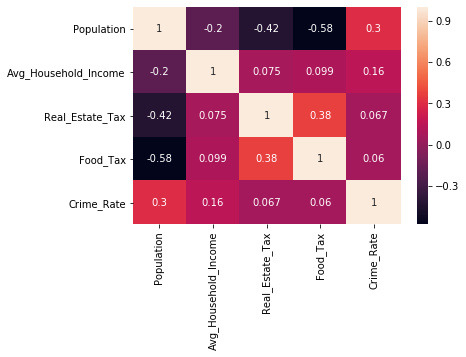

In [24]:
# create correlation matrix of ranked metrics
ranked_corr = df_rockingham_ranked.drop(['Latitude', 'Longitude'], 1)
ranked_corr = ranked_corr.corr()
sn.heatmap(ranked_corr, annot=True)
plt.show()

##### *Use K-means clustering to cluster cities by similarly ranked metrics*

##### *Find ideal number of **k** clusters*

In [25]:
# standardizing the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df_rockingham_ranked_clustering = df_rockingham_ranked.drop(['City', 'Latitude', 'Longitude'], 1)
data_scaled = scaler.fit_transform(df_rockingham_ranked_clustering)

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters=2, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=2, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
# inertia on the fitted data
kmeans.inertia_

34.01651724694579

##### *Plot elbow method to determine number of **k** clusters*

Text(0, 0.5, 'Inertia')

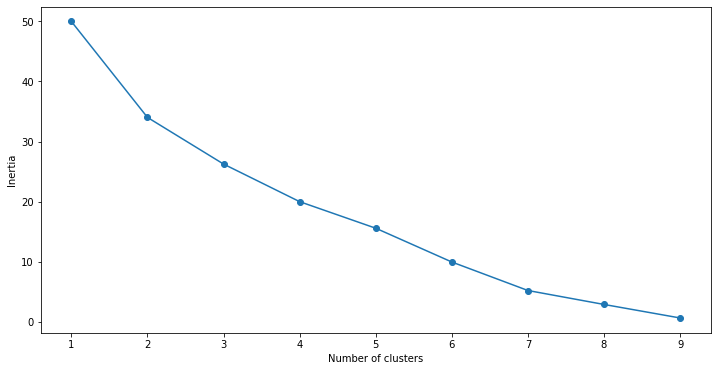

In [27]:
import matplotlib.pyplot as plt

# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,10):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,10), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

##### *Use results from elbow method above to initialize **k** clusters*

In [28]:
# k means using 7 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

In [29]:
frame = pd.DataFrame(data_scaled)
frame['Cluster Labels'] = pred
frame['Cluster Labels'].value_counts()

5    2
4    2
2    2
6    1
3    1
1    1
0    1
Name: Cluster Labels, dtype: int64

In [30]:
# set number of clusters
kclusters = 7

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, init='k-means++').fit(data_scaled)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([4, 1, 0, 1, 3, 6, 3, 2, 5, 2], dtype=int32)

##### *Create table with of ranked city metrics with cluster labels*

In [31]:
# add clustering labels
df_rockingham_ranked.insert(8, 'Cluster Labels', kmeans.labels_)
df_rockingham_ranked

,City,Latitude,Longitude,Population,Avg_Household_Income,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels
0,Harrisonburg,38.4496,-78.8689,10,2,0,1,1,4
1,Elkton,38.4079,-78.6236,7,6,6,1,3,1
2,Broadway,38.6132,-78.7989,8,3,9,7,9,0
3,Dayton,38.4138,-78.9389,3,5,7,3,7,1
4,Massanutten,38.4096,-78.7378,5,10,3,7,6,3
5,Bridgewater,38.3821,-78.9767,9,8,1,2,8,6
6,McGaheysville,38.3711,-78.7326,4,7,3,7,6,3
7,Timberville,38.6390,-78.7739,6,4,6,7,4,2
8,Mount Crawford,38.3571,-78.9409,1,9,9,7,0,5
9,Linville,38.5204,-78.8375,2,1,3,7,2,2


##### *Create a visual map of the Rockingham County area highlighting these clusters*

In [32]:
latitude = df_rockingham_ranked['Latitude'].mean()
longitude = df_rockingham_ranked['Longitude'].mean()

# create map
rockingham_ranked_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_rockingham_ranked['Latitude'], df_rockingham_ranked['Longitude'], df_rockingham_ranked['City'], df_rockingham_ranked['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[int(cluster)-1],
        fill=True,
        fill_color=rainbow[int(cluster)-1],
        fill_opacity=0.7).add_to(rockingham_ranked_clusters)
       
rockingham_ranked_clusters

##### *Lastly, sum values of ranks and create a sorted table to show cities from best ranked metrics to worst*

In [33]:
rockingham_ranks_sum = df_rockingham_ranked.drop(['City', 'Latitude', 'Longitude', 'Cluster Labels'], 1)
rockingham_ranks_sum['Sum'] = rockingham_ranks_sum.sum(axis=1)
df_rockingham_ranked.insert(9, 'Sum', rockingham_ranks_sum['Sum'])
df_rockingham_ranked.sort_values(by=['Sum'], ascending=False)

,City,Latitude,Longitude,Population,Avg_Household_Income,Real_Estate_Tax,Food_Tax,Crime_Rate,Cluster Labels,Sum
2,Broadway,38.6132,-78.7989,8,3,9,7,9,0,36
4,Massanutten,38.4096,-78.7378,5,10,3,7,6,3,31
5,Bridgewater,38.3821,-78.9767,9,8,1,2,8,6,28
6,McGaheysville,38.3711,-78.7326,4,7,3,7,6,3,27
7,Timberville,38.6390,-78.7739,6,4,6,7,4,2,27
8,Mount Crawford,38.3571,-78.9409,1,9,9,7,0,5,26
3,Dayton,38.4138,-78.9389,3,5,7,3,7,1,25
1,Elkton,38.4079,-78.6236,7,6,6,1,3,1,23
9,Linville,38.5204,-78.8375,2,1,3,7,2,2,15
0,Harrisonburg,38.4496,-78.8689,10,2,0,1,1,4,14


### *Please view the report for this case study for further information, insight, and the recommendations from the time that this report was ran!*